In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

NUMBER_NODE_LIMIT = 2000
LF_TIME_LIMIT = 7000.0

bb = pd.read_csv('/home/gsarthou/Robots/Pr2/Semantic/catkin_ws/ksp_base_stats.csv')
bb = bb.astype({'severin ok': 'bool', " soft diff": 'bool'})

NB_OBJECTS = len(bb.index)

print(bb.dtypes)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

#shun = pd.read_csv('/home/gsarthou/Robots/Pr2/Semantic/catkin_ws/ksp_base_stats.csv')
#shun = shun.astype({'success': 'bool'})

bb#, shun


indiv id            object
ucs_time(ms)       float64
ucs_result_size      int64
ucs_nb indiv         int64
ucs_nodes            int64
severin ok            bool
 soft diff            bool
dtype: object


,indiv id,ucs_time(ms),ucs_result_size,ucs_nb indiv,ucs_nodes,severin ok,soft diff
0,table_O_0,0.478838,3,1,8,True,True
1,table_l_1,0.425897,3,2,12,False,True
2,room_B_table_0,0.245021,2,1,4,True,True
3,drawer_O_0,0.013237,1,1,2,True,True
4,chair_O_1,0.317905,3,1,5,True,True
5,room_B_chair_2,0.435847,3,1,9,True,True
6,room_B_chair_1,0.474871,3,2,10,False,True
7,room_B_chair_0,0.546668,4,2,10,False,True
8,coat_hanger_l_0,0.066575,2,1,3,True,True
9,box_O_5,0.619296,4,2,5,False,True


In [122]:
bb["ucs_time(ms)"].describe()

count    77.000000
mean      1.080750
std       1.355236
min       0.013237
25%       0.193782
50%       0.516371
75%       1.322064
max       6.405807
Name: ucs_time(ms), dtype: float64

In [127]:
#x_max = max(bb["ucs_time(ms)"].describe().max(), bb["ids_time(ms)"].describe().max(), bb["dfs_time(ms)"].describe().max()) + 10
ucs_max = bb["ucs_time(ms)"].describe().max()

x_max = 10
xs = np.linspace(0, x_max, 1000)
ys_ucs = [len(bb[bb["ucs_time(ms)"] < x].index) * 100 / NB_OBJECTS for x in xs]

[-20.   0.  20.  40.  60.  80. 100. 120.]


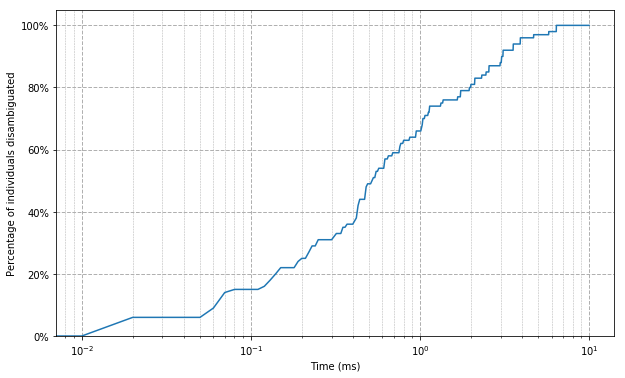

In [128]:


fig, ax = plt.subplots()
fig.set_size_inches(10, 6, forward=True)
plt.plot(xs, ys_ucs, '#1f77b4')
plt.grid(axis='x', which="minor", linestyle="--", linewidth=0.5)
plt.grid(axis='both', which="major", linestyle="--", linewidth=1)
vals = ax.get_yticks()
print(vals)
ax.set_yticklabels(['{:0.0f}%'.format(x) for x in vals[1:]])
#plt.plot([ucs_max, ucs_max], [-10, 105], '--', lw=1)
plt.xscale("log")
#plt.legend(("UCS", ))
plt.xlabel("Time (ms)")
plt.ylabel("Percentage of individuals disambiguated")
plt.ylim(0, 105)
plt.show()

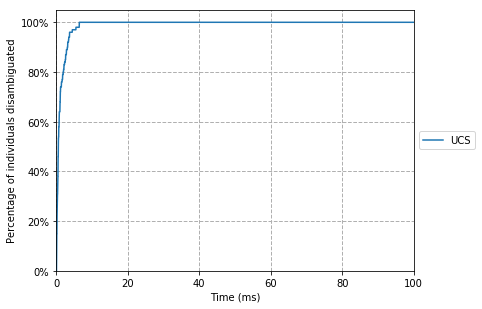

In [87]:

fig, ax = plt.subplots(figsize=(8.0, 4.8))
plt.plot(xs, ys_ucs, '#1f77b4')
plt.grid(axis='x', which="minor", linestyle="--", linewidth=0.5)
plt.grid(axis='both', which="major", linestyle="--", linewidth=1)
vals = ax.get_yticks()
ax.set_yticklabels(['{:0.0f}%'.format(x) for x in vals[1:]])
plt.xlim(0, 100)
vals = ax.get_xticks()
ax.set_xticklabels(['{:0.0f}'.format(x) for x in vals])
#plt.plot([ucs_max, ucs_max], [-10, 105], '--', lw=1)
#plt.xscale("log")
#plt.legend(("UCS", "IDS", "DFS", "LF"))
plt.xlabel("Time (ms)")
plt.ylabel("Percentage of individuals disambiguated")
plt.ylim(0, 105)
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
plt.legend(("UCS",), loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [88]:
bb["ucs_result_size"].value_counts()

2    27
3    20
4    15
5     9
1     5
6     1
Name: ucs_result_size, dtype: int64

In [89]:
bb["ucs_result_size"].describe()

count    77.000000
mean      2.987013
std       1.186475
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       6.000000
Name: ucs_result_size, dtype: float64

In [90]:
100 - (len(bb[bb["severin ok"]]) / NB_OBJECTS * 100)

100

In [91]:
bb["ucs_nb indiv"].describe()

count    77.000000
mean      1.519481
std       0.552754
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       3.000000
Name: ucs_nb indiv, dtype: float64

In [92]:
bb["ucs_nb indiv"].value_counts()

1    39
2    36
3     2
Name: ucs_nb indiv, dtype: int64

[1 1 1 2 2 2 2 2 2 2 1 1 1 2 1 1 1 2 2 1 2 1 1 2 1 1 2 1 2 1 1 1 2 1 3 2 2
 2 3 2 1 1 2 1 1 1 2 2 2 1 1 2 1 2 1 1 1 1 1 2 1 2 2 1 2 2 2 2 2 2 1 1 2 1
 1 2 2 1]


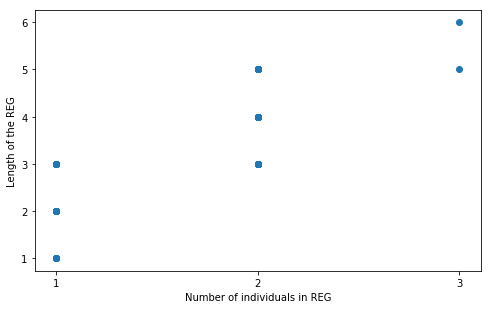

In [39]:
from matplotlib.ticker import MaxNLocator 
xs2 = bb["ucs_nb indiv"].values
ys2 = bb["ucs_result_size"].values

print(xs2)

fig, ax = plt.subplots(figsize=(8.0, 4.8))
ax.scatter(xs2, ys2)
#plt.grid(axis='x', which="minor", linestyle="--", linewidth=0.5)
#plt.grid(axis='both', which="major", linestyle="--", linewidth=1)
#vals = ax.get_yticks()
#ax.set_yticklabels(['{:0.0f}%'.format(x) for x in vals[1:]])
#vals = ax.get_xticks()
#ax.set_xticklabels(['{:0.2f}'.format(x/1000) for x in vals])
#plt.plot([ucs_max, ucs_max], [-10, 105], '--', lw=1)
#plt.xscale("log")
#plt.legend(("UCS", "IDS", "DFS", "LF"))
plt.xlabel("Number of individuals in REG")
plt.ylabel("Length of the REG")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
# Shrink current axis by 20%
#box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
#plt.legend(("UCS",), loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [28]:
shun_success = shun[shun["success"]]
ratio = shun_success["shunli"]/shun_success["ours"]
#shun_success
ratio.describe()

KeyError: 'success'